In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import numpy as np
from skimage.external.tifffile import imread
from skimage import io
import os
from os.path import join as oj
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate, train_test_split
import data 

X, Y = data.get_data()

/system/linux/anaconda3.7/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


# look at data

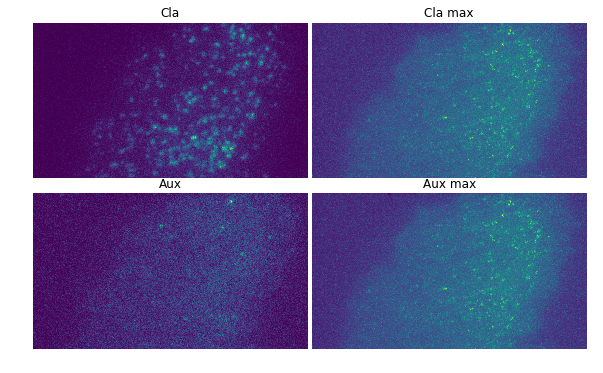

In [6]:
R, C = 2, 2
plt.figure(figsize=(C*5, R*3))

plt.subplot(R, C, 1)
plt.title('Cla')
plt.imshow(X[0])

plt.subplot(R, C, 2)
plt.title('Cla max')
plt.imshow(Y.max(axis=0))

plt.subplot(R, C, 3)
plt.title('Aux')
plt.imshow(Y[0])

plt.subplot(R, C, 4)
plt.title('Aux max')
plt.imshow(Y.max(axis=0))
plt.subplots_adjust(hspace=0.1, wspace=0)

for i in range(1, 5):
    plt.subplot(R, C, i)
    plt.axis('off')

# look at individual pixels

In [27]:
Xt = X.reshape(X.shape[0], -1)
Yt = Y.reshape(Y.shape[0], -1)

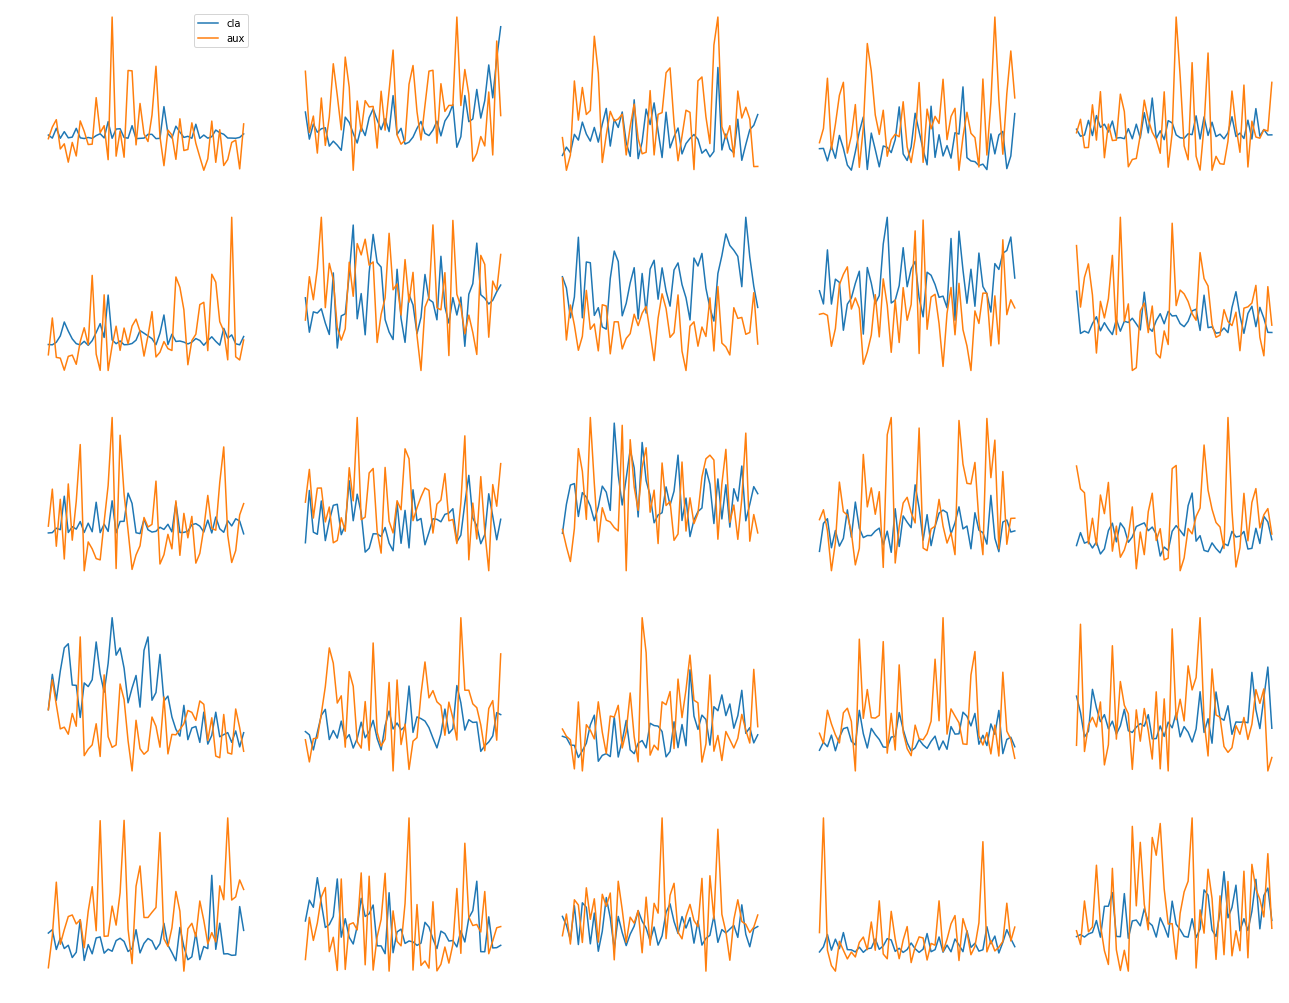

In [24]:
R, C = 5, 5
n = 50
plt.figure(figsize=(18, 14))
pixels = np.random.choice(np.arange(114750), size=100, replace=False)
for i in range(1, R * C + 1):
    plt.subplot(R, C, i)
    plt.plot(Xt[:n, pixels[i]], label='cla')
    plt.plot(Yt[:n, pixels[i]], label='aux')
    plt.axis('off')
    
    if i == 1:
        plt.legend()
plt.tight_layout()

# look at patches

In [ ]:
X_patches, _ = data.extract_patch_features(X, Y)
Y_patches, _ = data.extract_patch_features(Y, X)

In [ ]:
pixel_num = 100
R, C = 2, 6
plt.figure(figsize=(18, 6))
for i in range(1, C + 1):
    plt.subplot(R, C, i)
    plt.imshow(X_patches[pixel_num, :, :, i])
    plt.axis('off')
    
    plt.subplot(R, C, i + C)
    plt.imshow(Y_patches[pixel_num, :, :, i])
    plt.axis('off')
    
    if i == 0:
        plt.legend()
plt.tight_layout()